In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = '/content/drive/MyDrive/FaceCup'
%cd {PATH}

/content/drive/MyDrive/FaceCup


In [ ]:
#!unzip facecup_train.zip
#!unzip facecup_test.zip

***
# Facenet

In [ ]:
#!git clone https://github.com/arsfutura/face-recognition

In [ ]:
#!pip install -r face-recognition/requirements.txt

In [ ]:
#!chmod +x {PATH}/face-recognition/tasks/train.sh 

In [ ]:
#!{PATH}/face-recognition/tasks/train.sh {PATH}/images

In [ ]:
#%cd face-recognition/training
#!python train.py

*** 
# Kaggle


In [ ]:
!pip install mtcnn

     |████████████████████████████████| 2.3MB 8.2MB/s 


In [ ]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [ ]:
!wget https://github.com/satinder147/Attendance-using-Face/raw/master/facenet_keras.h5

--2020-12-12 20:00:38--  https://github.com/satinder147/Attendance-using-Face/raw/master/facenet_keras.h5
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/satinder147/Attendance-using-Face/master/facenet_keras.h5 [following]
--2020-12-12 20:00:38--  https://raw.githubusercontent.com/satinder147/Attendance-using-Face/master/facenet_keras.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92397640 (88M) [application/octet-stream]
Saving to: ‘facenet_keras.h5’

facenet_keras.h5    100%[===================>]  88.12M  80.6MB/s    in 1.1s    

2020-12-12 20:00:40 (80.6 MB/s) - ‘facenet_keras.h5’ saved [

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

import os
print(os.listdir(PATH))

['facecup_train.zip', 'face-recognition', 'train', 'facecup_test.zip', 'test']


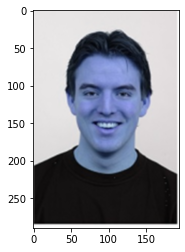

(290, 194, 3)


In [ ]:
# see a sample image
img = cv2.imread('train/person1/S000001.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

The extract_face function load a image file and return the extracted face in 160 * 160 pixels shape as needed for trained FaceNet model

In [ ]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
  # load image from file
  image = Image.open(filename)
  # convert to RGB, if needed
  image = image.convert('RGB')
  # convert to array
  pixels = np.asarray(image)
  
  # create the detector, using default weights
  detector = MTCNN()
  # detect faces in the image
  results = detector.detect_faces(pixels)

  face_array = []
  
  if len(results) > 0:
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)

  return face_array

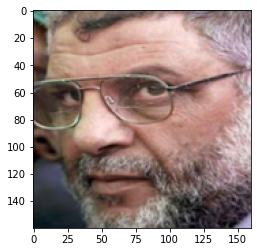

(160, 160, 3)


In [ ]:
# load the photo and extract the face
pixels = extract_face('train/person31/S000126.jpg')
#pixels = extract_face('test/person17/S000427.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [ ]:
def load_face(dir):
  faces = list()
  # enumerate files
  for filename in os.listdir(dir):
    if len(filename): 
      path = dir + filename
      face = extract_face(path)
      if len(face):
        faces.append(face)
  return faces

def load_dataset(dir):
  # list for faces and labels
  X, y = list(), list()
  for subdir in os.listdir(dir):
    path = dir + '/' + subdir + '/'
    faces = load_face(path)
    labels = [subdir for i in range(len(faces))]
    print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
    X.extend(faces)
    y.extend(labels)
  return np.asarray(X), np.asarray(y)        

In [ ]:
# load train dataset
trainX, trainy = load_dataset('train')
print(trainX.shape, trainy.shape)

# load test dataset
testX, testy = load_dataset('test')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('faces-dataset.npz', trainX, trainy, testX, testy)

loaded 9 sample for class: person2
loaded 5 sample for class: person3
loaded 5 sample for class: person4
loaded 2 sample for class: person5
loaded 4 sample for class: person6
loaded 3 sample for class: person7
loaded 2 sample for class: person8
loaded 3 sample for class: person9
loaded 4 sample for class: person10
loaded 5 sample for class: person11
loaded 2 sample for class: person12
loaded 3 sample for class: person13
loaded 3 sample for class: person14
loaded 3 sample for class: person15
loaded 2 sample for class: person16
loaded 4 sample for class: person17
loaded 9 sample for class: person1
loaded 8 sample for class: person18
loaded 6 sample for class: person19
loaded 2 sample for class: person20
loaded 3 sample for class: person21
loaded 4 sample for class: person22
loaded 8 sample for class: person23
loaded 4 sample for class: person24
loaded 3 sample for class: person25
loaded 3 sample for class: person26
loaded 4 sample for class: person27
loaded 6 sample for class: person28
l

In [ ]:
# load the face dataset
data = np.load('faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (390, 160, 160, 3) (390,) (195, 160, 160, 3) (195,)


In [ ]:
# load the facenet model
from keras.models import load_model
facenet_model = load_model('facenet_keras.h5')
print('Loaded Model')

Loaded Model


In [ ]:
def get_embedding(model, face):
  # scale pixel values
  face = face.astype('float32')
  # standardization
  mean, std = face.mean(), face.std()
  face = (face-mean)/std
  # transfer face into one sample (3 dimension to 4 dimension)
  sample = np.expand_dims(face, axis=0)
  # make prediction to get embedding
  yhat = model.predict(sample)
  return yhat[0]

In [ ]:
# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)
    
emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('faces-dataset.npz', emdTrainX, trainy, emdTestX, testy)

(390, 128)
(195, 128)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=390, test=195
Accuracy: train=100.000, test=93.846


Predicted: 
['person1' 'person10' 'person100' 'person101' 'person102'] 
[0.66932503 0.44070111 0.53436322 0.62751189 1.03632258 0.52110227
 1.29029909 0.95232725 0.83355474 0.36759377 0.66249575 0.99835562
 0.96971362 0.73635884 0.57494412 0.76288331 1.71300829 1.47942603
 0.71137251 0.7099827  0.69252436 0.83622245 0.86167849 0.67693093
 0.95143718 0.69288453 0.96413422 0.82661697 0.92099942 1.01295015
 0.04192465 0.85722767 0.66631911 0.93521202 1.12285652 0.65219801
 0.59226826 1.08939566 0.74016897 0.76860037 0.50648146 1.31425622
 0.59299244 0.69855585 0.65305404 1.03643875 0.96419167 1.21982296
 0.8877437  0.94775004 1.56357181 0.93180353 0.7690014  1.02255523
 1.41693323 0.52695298 1.13961774 1.02855619 0.99199943 0.95248278
 1.15219674 1.51264678 0.94940495 0.74827778 1.15120192 1.002288
 1.69120705 1.03323432 0.82365119 0.82225734 1.18175633 4.01880855
 1.19526078 0.82905119 1.73269837 0.73160893 1.29690716 0.78867471
 1.33740101 1.55641907 0.8224169  0.77134221 0.71619439 0.8

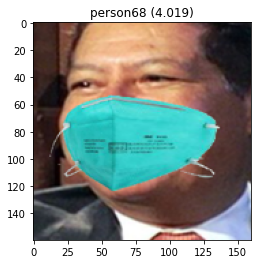

In [ ]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform([0,1,2,3,4])
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()